In [1]:
import numpy as np
import pandas as pd
from plotly import graph_objects as go
import scipy

from models import PoissonEM

axis_col = 'rgba(0, 0, 0, 0.15)'
zero_col = 'rgba(0, 0, 0, 0.3)'
no_col = 'rgba(0, 0, 0, 0)'

xaxis_desc: dict = dict(linecolor=no_col, gridcolor=axis_col, zerolinecolor=zero_col, zerolinewidth=2)
yaxis_desc: dict = dict(linecolor=no_col, gridcolor=axis_col, zerolinecolor=zero_col, zerolinewidth=2)
layout = dict(
    autosize=True,
    width=1400,
    height=400,
    margin=dict(
        l=60, r=25, b=60, t=60, pad=5
    ),
    # paper_bgcolor="white",
    font_family="Times New Roman",
    font_color="black",
    font_size=20,
    plot_bgcolor='white',
    xaxis=dict(**xaxis_desc, ),
    yaxis=yaxis_desc,
)


In [2]:
scipy.stats.poisson.pmf([1, 2, 3], 4)

array([0.07326256, 0.14652511, 0.19536681])

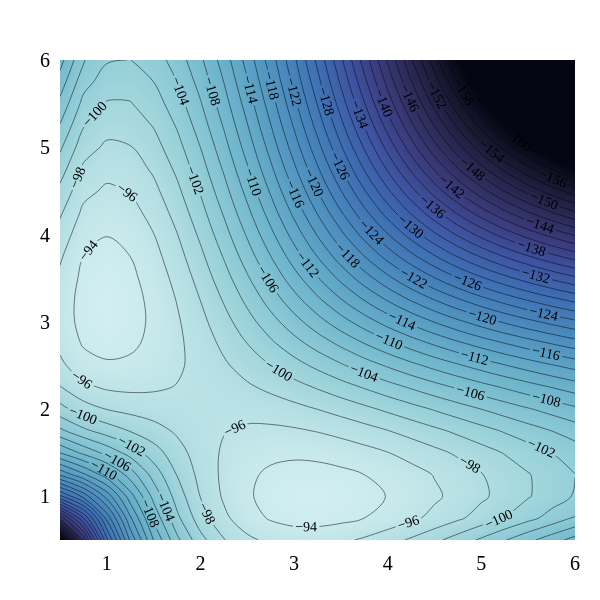

In [3]:
pi = np.array((0.5, 0.5))
given_lambdas = np.array((0.6, 1))
xs = pd.read_csv('./pmm_q3.tsv', header=None).to_numpy()
K = len(pi)

step = 0.25
samples = np.arange(0.5, 6+step, step)
ll = np.zeros(shape=(len(xs), 2))

fig = go.Figure()
ll = np.zeros(shape=(len(samples), len(samples)))

for i, x in enumerate(samples):
    for j, y in enumerate(samples):
        ll[i, j] = np.log(
            np.vstack([pi[k]*scipy.stats.poisson.pmf(xs, [x, y][k]) for k in range(K)]).sum(axis=0)
        ).sum()

fig.add_trace(
    go.Contour(
        z = ll,
        x=samples, y=samples,
        colorscale='ice',
        contours=dict(
            coloring ='heatmap',
            showlabels = True,
            labelfont = dict( 
                size = 14,
                color = 'black',
            ),
        ),
        showlegend=False,
        showscale=False,
    ),
)
fig.update_traces(contours_start=-160, contours_end=-90, contours_size=2)

fig.update_annotations(font_size=24)
_layout = layout.copy()
_layout["width"] = 600
_layout["height"] = 600
fig.update_layout(go.Layout(_layout))

# fig.show()
from IPython.display import Image
Image(filename='q3a.png')

In [10]:
model = PoissonEM(
    alphas=[1, 1],
    nu = 2, beta = 2,
    weighted_lambdas = False,
    initial_lambdas=[0.6, 1],
    iterations=30,
    random_seed=0,
)

xs = pd.read_csv('pmm_q3.tsv', header=None).to_numpy()
model.Fit(xs)
print()
print(f"π: {model.pi}")
print(f"λ: {model.lambdas}")

30: log lik.: -95.843 | delta: 0.000000           

π: [0.5 0.5]
λ: [0.9750350478052152, 3.191262360091856]


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


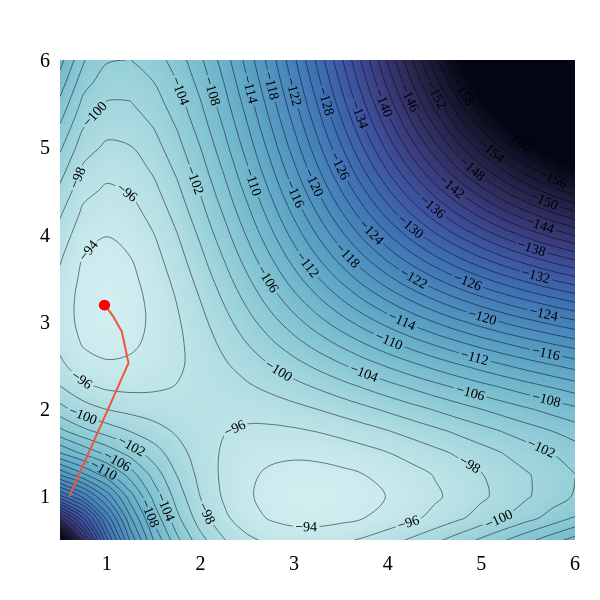

In [11]:
fig = go.Figure()
fig.add_trace(
    go.Contour(
        z = ll,
        x=samples, y=samples,
        colorscale='ice',
        contours=dict(
            coloring ='heatmap',
            showlabels = True,
            labelfont = dict( 
                size = 14,
                color = 'black',
            ),
        ),
        showlegend=False,
        showscale=False,
    ),
)
fig.update_traces(contours_start=-160, contours_end=-90, contours_size=2)

start = 0
end = -1
fig.add_trace(
    go.Scatter(
        x = [x for x, y in model.lambda_history],
        y = [y for x, y in model.lambda_history],
        mode="lines"
    )
)

r = 0.05
last_pt = model.lambdas
fig.add_shape(
    type="circle",
    xref="x", yref="y",
    x0 = last_pt[0]-r, y0 = last_pt[1]-r,
    x1 = last_pt[0]+r, y1 = last_pt[1]+r,
    fillcolor="red",
    line_color="red",
)
fig.update_traces(contours_start=-160, contours_end=-90, contours_size=2, selector=dict(type='contour'))

fig.update_annotations(font_size=24)
_layout = layout.copy()
_layout["width"] = 600
_layout["height"] = 600
fig.update_layout(go.Layout(_layout))

# fig.show()
from IPython.display import Image
Image(filename='q3b.png')